In [1]:
import os
import json 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from pathlib import Path
from pytz import timezone
import pytz
import calendar
import time

from datetime import datetime

In [2]:

data = {}

# MQTT Logs 

In [3]:
mqtt_log_dir = './worker2_gamutrf'
mqtt_log_paths = [mqtt_log_dir+'/'+d for d in os.listdir(mqtt_log_dir)]

In [4]:
def plt_metric(df, metric=None):
    assert metric in df
    
    plt.figure()
    plt.plot(df[metric])
    plt.title('{}'.format(metric))
    plt.xlabel('time')
    plt.show()

In [5]:
mqtt_unixtimes = {}
for i in range(len(mqtt_log_paths)):    
    mqtt_unixtimes[mqtt_log_paths[i]] = float(Path(mqtt_log_paths[i]).stem.split('-')[-1])

mqtt_times_sorted = sorted(list(mqtt_unixtimes.values()))


In [6]:
df_main = pd.DataFrame(columns=['unixtime'])
mqtt_count = 0 
for i in range(len(mqtt_log_paths)): 
    log = []
    with open(mqtt_log_paths[i], 'r') as mqtt_file:
        for line in mqtt_file: 
            l = json.loads(line)
            log.append(l)
            unixtimestamp = l['gps_time']
            if unixtimestamp is not None: 
                unixtimestamp = int(unixtimestamp)
                mqtt_count += 1 
                if unixtimestamp not in data: 
                    data[unixtimestamp] = l
                else: 
                    data[unixtimestamp].update(l)
            
            
    print(mqtt_log_paths[i],' contains ',len(log),' entries')
    #print (log)
    
    df = pd.DataFrame(log)
    #plt_metric(df, 'rssi')
    a = list(df['time'])
    #print(a[0:10])
    a = list(df['gps_time'])
    #print(a[0:10])
    df['unixtime'] = df['time'].to_numpy().astype(np.int)

    #df_main = df_main.merge(df, how='outer', on=[c for c in list(df_main.columns) if c in list(df.columns)])
    print(df['unixtime'][0],' : ',df['unixtime'].iloc[-1])
    #print(df['time'][0])
    #print(df['time'][len(df['time']-1)])


./worker2_gamutrf/mqtt-rssi-1653598742.8098805.log  contains  1335  entries
1653598742  :  1653600079
./worker2_gamutrf/mqtt-rssi-1653586596.6105318.log  contains  266  entries
1653586596  :  1653586867
./worker2_gamutrf/mqtt-rssi-1653587241.617232.log  contains  341  entries
1653587262  :  1653587717
./worker2_gamutrf/mqtt-rssi-1653587981.4320872.log  contains  1230  entries
1653587981  :  1653591345
./worker2_gamutrf/mqtt-rssi-1653597102.8017416.log  contains  344  entries
1653597102  :  1653597446


# BirdsEye Logs

In [7]:
birdseye_logs = [d.path for d in os.scandir('./birdseye/runs/') if os.path.isdir(d)]

In [8]:
birdseye_unixtimes = {}
for log in birdseye_logs: 
    try: 
        birdseye_unixtimes[log] = calendar.timegm(time.strptime(Path(log).stem.split('_')[0], '%Y-%m-%dT%H:%M:%S' ))
    except: 
        pass

birdseye_times_sorted = sorted(list(birdseye_unixtimes.values()))


In [9]:
birdseye_count = 0
for log in birdseye_logs: 
    if os.path.isfile(log+'/observation.npy'):
        obs = np.load(log+'/observation.npy', allow_pickle=True)
        if not any(obs): 
            continue
        unix_timestamps = sorted([int(f.split('_')[0]) for f in os.listdir(log) if f.endswith('_particles.npy')])
        for ut, rssi in zip(unix_timestamps, obs): 
            birdseye_count += 1
            #print(ut, rssi,type(rssi))
            if ut not in data: 
                data[ut] = {'birdseye_rssi': rssi}
            else: 
                data[ut].update({'birdseye_rssi': rssi})
        df = pd.DataFrame()
        df['rssi'] = obs
        df['unixtimestamp'] = unix_timestamps
        
        print(log,' contains ',len(df['rssi']),' entries')
        print(df['unixtimestamp'][0],' : ',df['unixtimestamp'].iloc[-1])
        #plt_metric(df, 'rssi')

./birdseye/runs/2022-05-26T18:25:34_logs  contains  65  entries
1653589552  :  1653590111
./birdseye/runs/2022-05-26T18:47:55_logs  contains  89  entries
1653590883  :  1653591487
./birdseye/runs/2022-05-26T17:58:00_logs  contains  111  entries
1653587898  :  1653588809
./birdseye/runs/2022-05-26T21:01:57_logs  contains  307  entries
1653598926  :  1653600106
./birdseye/runs/2022-05-26T17:38:12_logs  contains  18  entries
1653586714  :  1653586866
./birdseye/runs/2022-05-26T20:28:22_logs  contains  78  entries
1653596913  :  1653597439


# Drone Logs

In [10]:
drone_time_raw = ("""$ GetFileInfo -d DJI_0003.MP4 
05/26/2022 11:19:36
$ GetFileInfo -d DJI_0004.MP4 
05/26/2022 11:28:45
$ GetFileInfo -d DJI_0005.MP4 
05/26/2022 11:33:56
$ GetFileInfo -d DJI_0006.MP4 
05/26/2022 11:36:35
$ GetFileInfo -d DJI_0007.MP4 
05/26/2022 11:38:40
$ GetFileInfo -d DJI_0008.MP4 
05/26/2022 13:41:45
$ GetFileInfo -d DJI_0009.MP4 
05/26/2022 14:06:13
$ GetFileInfo -d DJI_0010.MP4 
05/26/2022 14:11:41
$ GetFileInfo -d DJI_0011.MP4 
05/26/2022 14:26:10
$ GetFileInfo -d DJI_0012.MP4 
05/26/2022 14:31:38
$ GetFileInfo -d DJI_0013.MP4 
05/26/2022 14:37:08
$ GetFileInfo -d DJI_0014.MP4 
05/26/2022 14:40:18
$ GetFileInfo -d DJI_0015.MP4 
05/26/2022 14:45:47""")

drone_times = {}
for line in drone_time_raw.split('$'): 
    line = [l.strip() for l in line.split(' ')]
    
    for i in range(len(line)): 
        if line[i].endswith('.MP4'):
            timestr = ' '.join(line[i+1:])
            dt = datetime.strptime(timestr, '%m/%d/%Y %H:%M:%S')
            
            local = pytz.timezone("America/Los_Angeles")

            local_dt = local.localize(dt, is_dst=None)
            dt = local_dt.astimezone(pytz.utc)


            #dt = dt.replace(tzinfo=timezone.utc)
            #dt = dt.astimezone(timezone('US/Pacific'))
            
            #drone_times[line[i]] = calendar.timegm(time.strptime(timestr, '%m/%d/%Y %H:%M:%S'))
            drone_times[line[i]] = dt.timestamp()
            break
    
        
#print(drone_times)
drone_times_sorted = sorted(drone_times.values())
#print(drone_times_sorted)

In [11]:
drone_log_dir = './drone'
drone_log_paths = [drone_log_dir+'/'+d for d in os.listdir(drone_log_dir)]
drone_log_paths = sorted(drone_log_paths)
drone_count = 0 
for i in range(len(drone_log_paths)): 
    log = {}
    log.update({
        'position':[], 
        'unixtimestamp':[]
    })
    with open(drone_log_paths[i], 'r') as drone_file:
        unixtimestamp = int(drone_times[Path(drone_log_paths[i]).stem])
        for line in drone_file: 
            
            coord = line[line.find('('):line.find(')')][1:]
            if len(coord) == 0: 
                continue
            unixtimestamp += 1
            position = [float(c.strip()) for c in coord.split(',')[:2]]
            log['position'].append(position)
            log['unixtimestamp'].append(unixtimestamp)
            drone_count += 1
            if unixtimestamp not in data: 
                
                data[unixtimestamp] = {'drone_position':position}
            else: 
                
                data[unixtimestamp].update({'drone_position':position})
                
    log['position'] = np.array(log['position'])
    log['position'][:,[0,1]] = log['position'][:,[1,0]]
    
    print(drone_log_paths[i],' contains ',log['position'].shape[0],' entries')
#             log.append(json.loads(line))
#     print(mqtt_log_paths[i],' contains ',len(log),' entries')
    
    df = pd.DataFrame()
    df['position'] = log['position'].tolist()
    df['unixtimestamp'] = log['unixtimestamp']
    print(df['unixtimestamp'][0],' : ',df['unixtimestamp'].iloc[-1])
    #print(df)
    #plt_metric(df, 'rssi')

./drone/DJI_0003.MP4.srt  contains  61  entries
1653589177  :  1653589237
./drone/DJI_0004.MP4.srt  contains  56  entries
1653589726  :  1653589781
./drone/DJI_0005.MP4.srt  contains  60  entries
1653590037  :  1653590096
./drone/DJI_0006.MP4.srt  contains  64  entries
1653590196  :  1653590259
./drone/DJI_0007.MP4.srt  contains  690  entries
1653590321  :  1653591010
./drone/DJI_0008.MP4.srt  contains  366  entries
1653597706  :  1653598071
./drone/DJI_0009.MP4.srt  contains  328  entries
1653599174  :  1653599501
./drone/DJI_0010.MP4.srt  contains  306  entries
1653599502  :  1653599807
./drone/DJI_0011.MP4.srt  contains  328  entries
1653600371  :  1653600698
./drone/DJI_0012.MP4.srt  contains  329  entries
1653600699  :  1653601027
./drone/DJI_0013.MP4.srt  contains  67  entries
1653601029  :  1653601095
./drone/DJI_0014.MP4.srt  contains  328  entries
1653601219  :  1653601546
./drone/DJI_0015.MP4.srt  contains  220  entries
1653601548  :  1653601767


In [12]:
first_idx_found = None 
last_idx_found = None
last_ts = None 
i = 0
buffer = 0 
chunk_ts = []
for ts in sorted(data.keys()): 
    
    rssi = data[ts].get('rssi',None)
    position = data[ts].get('position',None)
    drone_position = data[ts].get('drone_position',None)

    if position and drone_position: 
        buffer = 0 
        last_idx_found = None
        #print('rssi = {}, position = {}, drone_position = {}'.format(rssi, position, drone_position))
        #print('match = ',ts)
        if first_idx_found is None: 
            first_idx_found = ts

    else: 
        buffer += 1
        
        if first_idx_found is not None and last_idx_found is None: #TODO : solve this line 
            last_idx_found = ts
        #if first_idx_found is not None and last_idx_found - first_idx_found > 15: 
            #print('buffer = ',buffer,'ts = ',ts)
        if buffer > 5 and first_idx_found is not None: 
            n_found = last_idx_found - first_idx_found

            if n_found > 20:
                chunk_ts.append([first_idx_found,last_idx_found])
                print('first found = ',first_idx_found)
                print('last found = ',last_idx_found)
                print('n_found = ',n_found)
            buffer = 0 
            
            first_idx_found = None
            last_idx_found = None
    i += 1

first found =  1653589177
last found =  1653589237
n_found =  60
first found =  1653590947
last found =  1653591007
n_found =  60
first found =  1653599174
last found =  1653599808
n_found =  634


In [13]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [14]:
# Data blocks as json
for start_ts,end_ts in chunk_ts: 
    data_block = {}
    for ts in range(start_ts,end_ts): 
        data_block[ts] = data[ts]

    with open('aligned_{}_{}.json'.format(start_ts,end_ts), 'w') as outfile:
        json.dump(data_block, outfile, cls=NumpyEncoder)
        print('saved ','aligned_{}_{}.json'.format(start_ts,end_ts))
        
# # Data blocks as csv
# for start_ts,end_ts in chunk_ts: 
#     data_block = []
#     for ts in range(start_ts,end_ts): 
#         data[ts]['unixtime'] = ts
#         data_block.append(data[ts])

#     df = pd.DataFrame(data_block)
#     df.to_csv('aligned_{}_{}.csv'.format(start_ts,end_ts))


saved  aligned_1653589177_1653589237.json
saved  aligned_1653590947_1653591007.json
saved  aligned_1653599174_1653599808.json


In [18]:

with open("aligned_1653599174_1653599808.json", "r") as read_content:
    json_data = json.load(read_content)

In [22]:
replay_ts = sorted(json_data.keys())

In [26]:
for ts in replay_ts: 
    if 'position' not in json_data[ts]: 
        print(ts,' position')
    if 'drone_position' not in json_data[ts]: 
        print(ts,' drone_position')
    if 'rssi' not in json_data[ts]: 
        print(ts,' rssi')


1653599238  position
1653599238  rssi
1653599247  position
1653599247  rssi
1653599249  position
1653599249  rssi
1653599260  position
1653599260  rssi
1653599263  position
1653599263  rssi
1653599265  position
1653599265  rssi
1653599267  position
1653599267  rssi
1653599272  position
1653599272  rssi
1653599732  position
1653599732  rssi
1653599741  position
1653599741  rssi
1653599745  position
1653599745  rssi
1653599748  position
1653599748  rssi
1653599750  position
1653599750  rssi


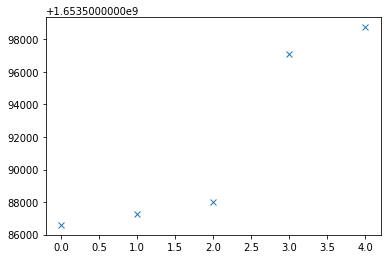

In [15]:
plt.figure()
ar = np.array(range(len(mqtt_times_sorted)))
plt.plot(ar,ar+mqtt_times_sorted, 'x')
#plt.plot(birdseye_times_sorted[2:], 'b+')
#plt.plot(drone_times_sorted, 'g^')
plt.show()

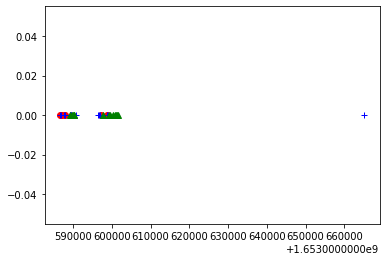

In [16]:
#y_range = np.max([len(mqtt_times_sorted), len(birdseye_times_sorted), len(drone_times_sorted)])
plt.figure()
plt.plot(mqtt_times_sorted,np.zeros_like(mqtt_times_sorted), 'ro')
plt.plot(birdseye_times_sorted[2:],np.zeros_like(birdseye_times_sorted[2:]), 'b+')
plt.plot(drone_times_sorted, np.zeros_like(drone_times_sorted), 'g^')
plt.show()

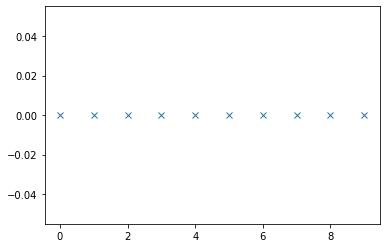

In [17]:
import numpy as np
import matplotlib.pyplot as pp
val = 0. # this is the value where you want the data to appear on the y-axis.
ar = np.arange(10) # just as an example array
pp.plot(ar, np.zeros_like(ar) + val, 'x')
pp.show()

In [31]:
def is_float(element):
    try:
        float(element)
        return True
    except (ValueError, TypeError):
        return False


In [33]:
is_float(None)

False